# Read in train File, and initial data analysis


In [1]:
#First, import all necessary libraries for data cleaning
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

In [2]:
#second, load in training data first
train_df = pd.read_csv('train_2016_v2.csv',header=0,parse_dates = ['transactiondate'])
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
#third, apply some value counts analysis to understand the data
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [4]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month
month_analysis = train_df['transaction_month'].value_counts().sort_index()
month_analysis

1      6556
2      6333
3      8652
4      9311
5      9961
6     10922
7      9947
8     10476
9      9575
10     4977
11     1826
12     1739
Name: transaction_month, dtype: int64

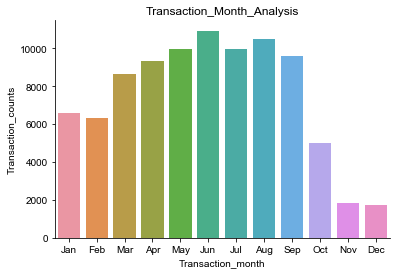

In [5]:
ax = sns.barplot(month_analysis.index,month_analysis.values)
plt.xlabel('Transaction_month')
plt.ylabel('Transaction_counts')
plt.title('Transaction_Month_Analysis')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(label)
# Set style to whitegrid
sns.set_style('whitegrid')
# Remove unwanted borders
sns.despine()

plt.show()

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


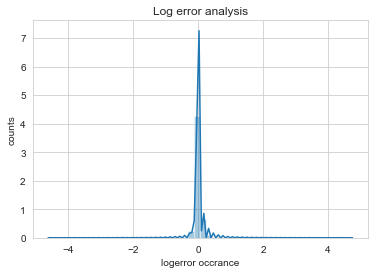

In [6]:
# 4, apply some value counts analysis to understand logerror
ax = sns.distplot(train_df['logerror'])
plt.xlabel('logerror occrance')
plt.ylabel('counts')
plt.title('Log error analysis')
plt.show()


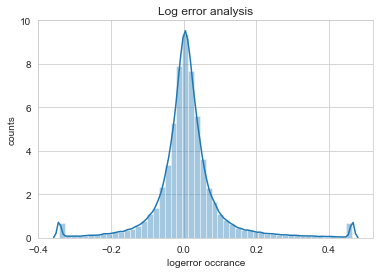

In [7]:
#get rid of outliers to plot it again
ulimit = np.percentile(train_df.logerror, 99)
llimit = np.percentile(train_df.logerror, 1)
log_errors = train_df['logerror'].clip(lower=llimit, upper=ulimit)

ax = sns.distplot(log_errors)
plt.xlabel('logerror occrance')
plt.ylabel('counts')
plt.title('Log error analysis')
plt.show()

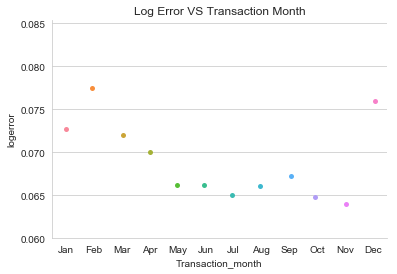

In [8]:
mean = abs(train_df['logerror']).groupby(train_df['transaction_month']).mean()
ax = sns.stripplot(mean.index,mean.values)
plt.xlabel('Transaction_month')
plt.ylabel('logerror')
plt.title('Log Error VS Transaction Month')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(label)
# Set style to whitegrid
sns.set_style('whitegrid')
# Remove unwanted borders
sns.despine()

plt.show()

# Read in Property File, and initial data analysis

In [9]:
property_df = pd.read_csv('properties_2016.csv',parse_dates = ['yearbuilt'])
property_df.head(5)


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [10]:
merged_df = train_df.merge(property_df, on = 'parcelid', how = 'left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 61 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
transaction_month               90275 non-null int64
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet1

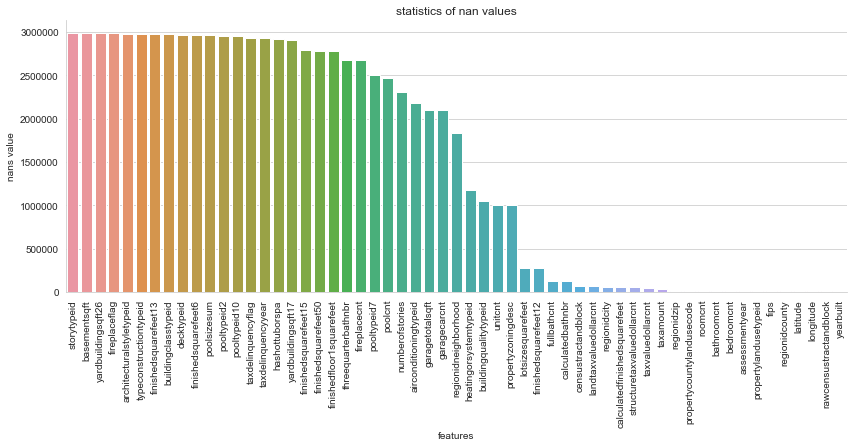

In [11]:
#bar plot of NAN value portion in features
plt.figure(figsize=(14, 5))
nans = property_df.drop('parcelid', axis=1).isnull().sum().sort_values(ascending=False)
ax = sns.barplot(nans.index,nans.values)
plt.xticks(rotation=90)
plt.xlabel('features')
plt.ylabel('nans value')
plt.title('statistics of nan values')
sns.set_style('whitegrid')
sns.despine()
plt.show()

In [12]:
#missing value percentage count
#miss_col_98 = pd.DataFrame(((property_df.isnull().sum())/len(property_df['storytypeid'])).reset_index(), columns = ['feature','percentage'])
#miss_col_98.head(5)
miss_col_96 = pd.DataFrame(((property_df.isnull().sum())/len(property_df['storytypeid'])).sort_values(ascending=False).reset_index())
miss_col_96 = miss_col_96.rename(columns={'index':'features',0:'percentage'})
miss_col_96[miss_col_96['percentage']>0.96]


,features,percentage
0,storytypeid,0.999456
1,basementsqft,0.999455
2,yardbuildingsqft26,0.999113
3,fireplaceflag,0.998270
4,architecturalstyletypeid,0.997970
5,typeconstructiontypeid,0.997740
6,finishedsquarefeet13,0.997430
7,buildingclasstypeid,0.995769
8,decktypeid,0.994273
9,finishedsquarefeet6,0.992630


In [13]:
#next step find out all numerical columns, and plot heatmaps for numerical columns
merged_df.dtypes.value_counts()

float64           52
object             6
int64              2
datetime64[ns]     1
dtype: int64

In [14]:
#seperate numerical columns as a lsit
type_object = []
type_num = []
type_date = []
for i in merged_df.columns:
    if merged_df[i].dtypes == 'object':
        type_object.append(i)
    elif merged_df[i].dtypes == 'datetime64[ns]':
        type_date.append(i)
    else:
        type_num.append(i)
len(type_num)      
        

54

In [15]:
#first remove object data, and date data
merged_num_df = merged_df.drop(type_object,axis = 1).drop(type_date,axis=1)


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


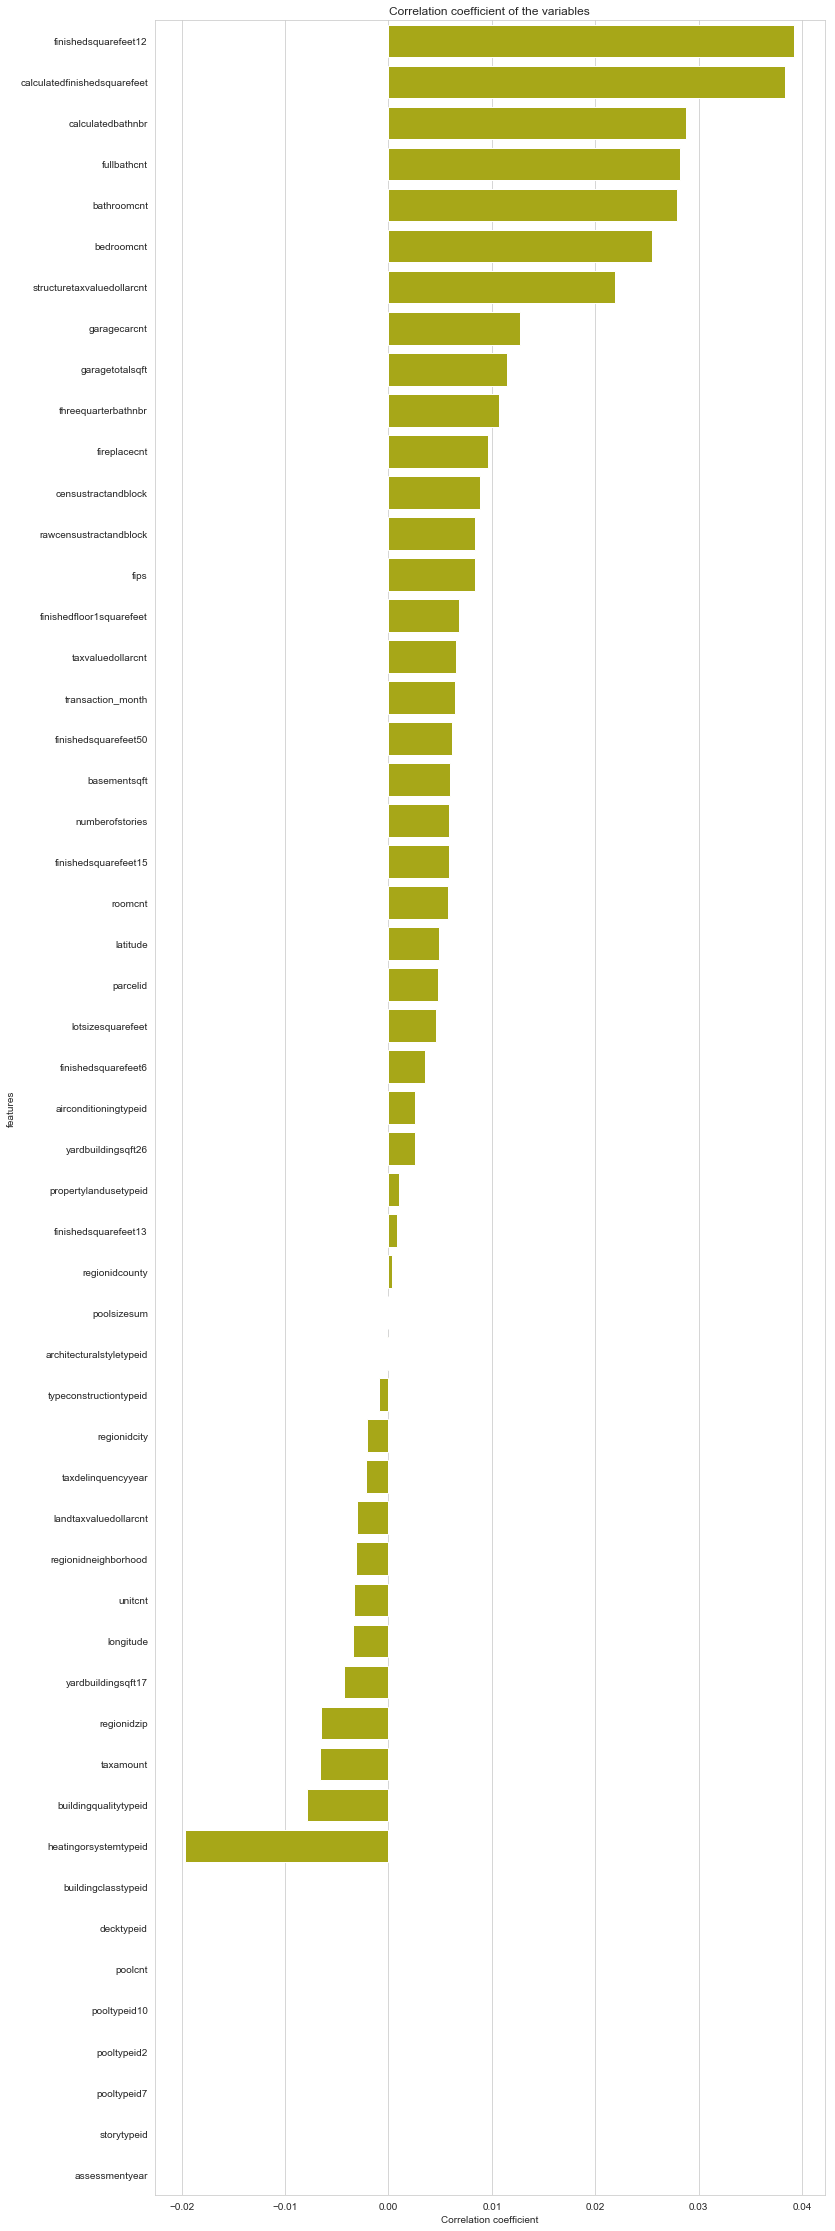

In [16]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
#first calculate correlation between logerror and numerical columns
mean_values = merged_num_df.mean(axis=0)
merged_num_df.fillna(mean_values, inplace=True)

labels = []
values = []
for col in merged_num_df.columns:
    labels.append(col)
    values.append(np.corrcoef(merged_num_df[col].values, merged_num_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values', ascending =False).reset_index()
corr_df.iloc[1:,:]

plt.figure(figsize=(12, 40))
ax = sns.barplot(np.array(corr_df.iloc[1:,:].corr_values), np.array(corr_df.iloc[1:,:].col_labels),color='y')
ax.set_yticklabels(corr_df.iloc[1:,:].col_labels)
plt.xlabel("Correlation coefficient")
plt.ylabel('features')
plt.title("Correlation coefficient of the variables")
plt.show()

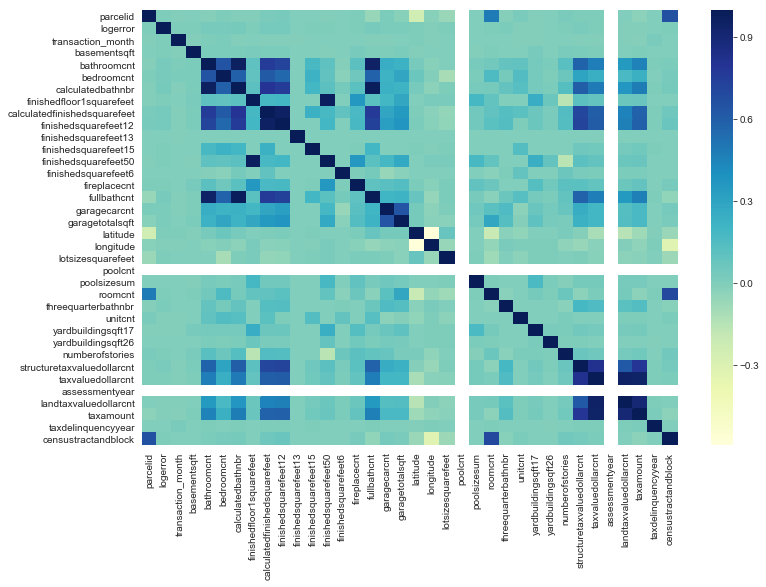

<Figure size 432x288 with 0 Axes>

In [17]:
#Identify numerical columns to produce a heatmap
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in merged_num_df.columns if x not in catcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=merged_num_df[numcols].corr(),cmap="YlGnBu")
plt.show()
plt.gcf().clear()

# Fill in missing data

Let's start by removing some 'potentially' redundant variables

The following are all very strongly correlated as can be seen by the dark blue path in the heatmap: (1)sqft related features: 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 
(2)bathroom related features: 'bathroomcnt','calculatedbathnbr'
(3) tax related: 'taxvaluedollarcnt', 'taxamount', 'landtaxaluedollarcnt'

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


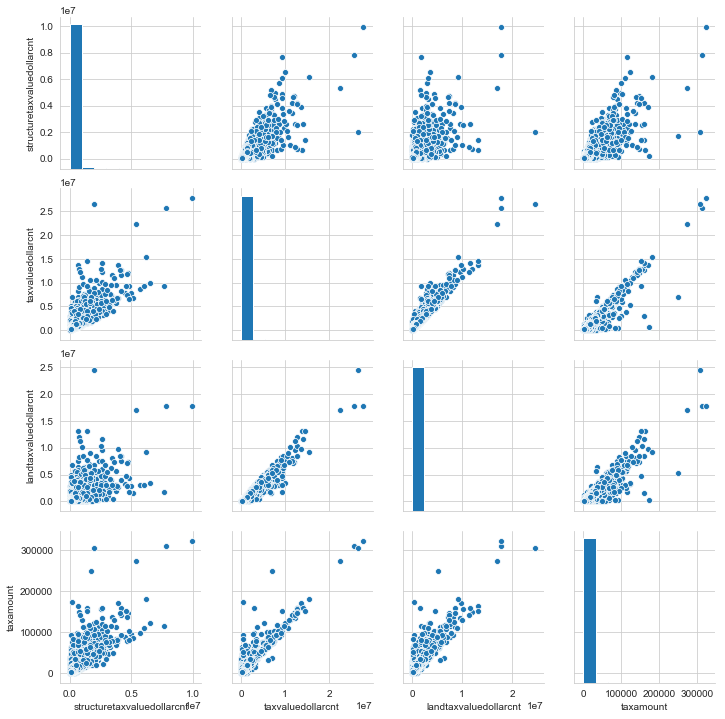

In [18]:
#pair plot tax-related features
tax_col = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']    
sns.pairplot(merged_df[tax_col])
plt.show()
#it seems taxvaluedollarcnt, landtaxvaluedollarcnt, and taxamount are linearly correlated, may consider other two values are redundant. 

In [19]:
#drop redudant features, and features with missing values more than 96% 
miss_col_96 = pd.DataFrame(((property_df.isnull().sum())/len(property_df['storytypeid'])).sort_values(ascending=False).reset_index())
miss_col_96 = miss_col_96.rename(columns={'index':'features',0:'percentage'})
miss_96_list=list(miss_col_96[miss_col_96['percentage']>0.96].features)
keep = ['hashottuborspa','taxdelinquencyflag', 'basementsqft','storytypeid']
miss_96_list_new = [i for i in miss_96_list if i not in keep]
miss_96_list_new

['yardbuildingsqft26',
 'fireplaceflag',
 'architecturalstyletypeid',
 'typeconstructiontypeid',
 'finishedsquarefeet13',
 'buildingclasstypeid',
 'decktypeid',
 'finishedsquarefeet6',
 'poolsizesum',
 'pooltypeid2',
 'pooltypeid10',
 'taxdelinquencyyear',
 'yardbuildingsqft17']

In [20]:
merged_df.drop(miss_96_list_new,axis=1, inplace = True)

In [21]:
merged_df.drop(['calculatedbathnbr', 'threequarterbathnbr', 'finishedsquarefeet12', 'finishedsquarefeet15', 'finishedsquarefeet50', 'rawcensustractandblock', 'taxamount', 'landtaxvaluedollarcnt', 'pooltypeid7'],axis=1, inplace = True)

In [22]:
merged_df.drop('finishedfloor1squarefeet',axis=1, inplace = True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 38 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
transaction_month               90275 non-null int64
airconditioningtypeid           28781 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fips                            90275 non-null float64
fireplacecnt                    9607 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
garagetotalsqft                 29937 non-null float64
hashottuborspa                  2365 non-null object
heatingorsyste

In [23]:
#Fill in missing values for categorical features as None 
index = merged_df['hashottuborspa'].isnull()
merged_df.loc[index,'hashottuborspa'] = 'False'

index = merged_df['taxdelinquencyflag'].isnull()
merged_df.loc[index,'taxdelinquencyflag'] = 'N'
index = merged_df['poolcnt'].isnull()
merged_df.loc[index,'poolcnt'] = 0

#fireplace related features, fireplace count, and fireplaceflag. Fireplaceflag has more missing values. 
index = merged_df['fireplacecnt'].isnull()
merged_df.loc[index,'fireplacecnt'] = 0
merged_df['storytypeid'].value_counts()

7.0    43
Name: storytypeid, dtype: int64

In [24]:
#fill missing values for basementsqft, and storytypeid
#index = merged_df[(merged_df['basementsqft']!=None) &(merged_df['storytypeid'] != None)]
index = merged_df[(merged_df['basementsqft'].isnull()) & (merged_df['storytypeid'].isnull())].index
index
merged_df.loc[index,['basementsqft','storytypeid']] = 0
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 38 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
transaction_month               90275 non-null int64
airconditioningtypeid           28781 non-null float64
basementsqft                    90275 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fips                            90275 non-null float64
fireplacecnt                    90275 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
garagetotalsqft                 29937 non-null float64
hashottuborspa                  90275 non-null object
heatingor

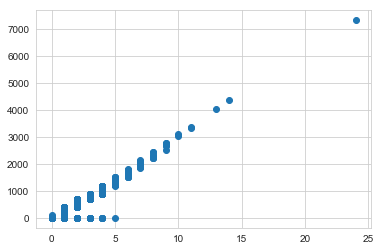

In [25]:
plt.scatter(x='garagecarcnt', y='garagetotalsqft',data = merged_df)                   
plt.show()

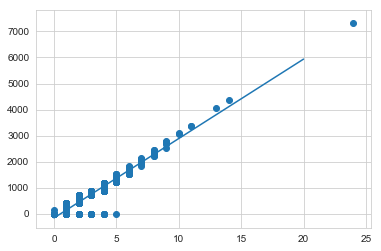

In [26]:
# Perform a linear regression using np.polyfit(): a, b
index = (merged_df['garagetotalsqft']>800.0)

a, b = np.polyfit(merged_df.loc[index,'garagecarcnt'], merged_df.loc[index,'garagetotalsqft'],1)

# Make theoretical line to plot
x = np.linspace(0,20,1000)
y = a * x + b

# Add regression line to your plot
plt.plot(x, y)
plt.scatter(x='garagecarcnt', y='garagetotalsqft',data = merged_df)   
# Show the plot
plt.show()

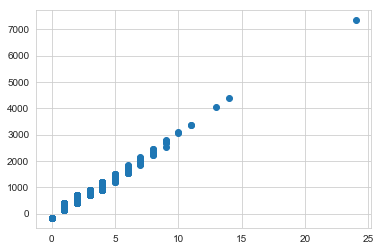

In [27]:
# fill in garagetotalsqft outliers with garagecarcnt to plot

index = (merged_df['garagetotalsqft']<200.0)
merged_df.loc[index,'garagetotalsqft'] = a * merged_df.loc[index,'garagecarcnt'] + b
plt.scatter(x='garagecarcnt', y='garagetotalsqft',data = merged_df)  
plt.show()

In [ ]:
merged_df.drop('garagecarcnt',axis=1, inplace = True)

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


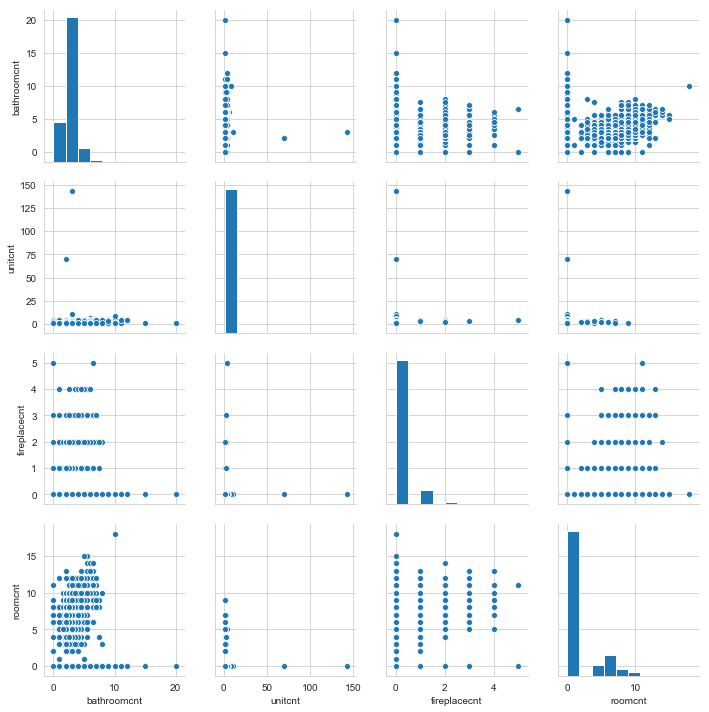

In [87]:
#also clean up bathroomcnt, bedroomcnt, firplacecnt, roomcnt, to get rid of outliers.
#first test bathroomcnt, fireplacecnt, roomcnt, unitcnt
#pair plot cnt-related features
cnt_col = ['bathroomcnt', 'unitcnt','fireplacecnt', 'roomcnt']    
sns.pairplot(merged_df[cnt_col])
plt.show()

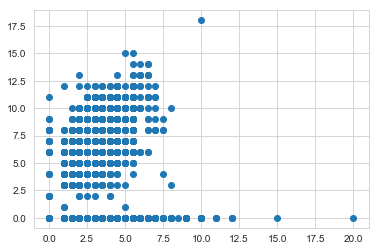

In [88]:
plt.scatter(x='bathroomcnt', y='roomcnt',data = merged_df)                   
plt.show()

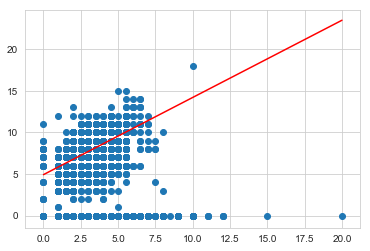

In [95]:
# Perform a linear regression using np.polyfit(): a, b
index = (merged_df['roomcnt']>5.)

a, b = np.polyfit(merged_df.loc[index,'bathroomcnt'], merged_df.loc[index,'roomcnt'],1)

# Make theoretical line to plot
x = np.linspace(0,20,1000)
y = a * x + b

# Add regression line to your plot
plt.plot(x, y,c='red')
plt.scatter(x='bathroomcnt', y='roomcnt',data = merged_df)   
# Show the plot
plt.show()

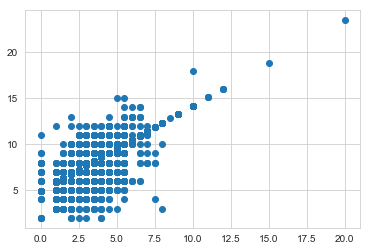

In [96]:
# fill in garagetotalsqft outliers with garagecarcnt to plot

index = (merged_df['roomcnt']<1.5)
merged_df.loc[index,'roomcnt'] = a * merged_df.loc[index,'bathroomcnt'] + b
plt.scatter(x='bathroomcnt', y='roomcnt',data = merged_df)  
plt.show()

# After boxplot inspection, following variables will be filled with median value, because of outliers influence.
garagecarcnt (use mean or median, 60000 missing), unitcnt(use median, 30000 missing), 
calculatedbathnbr (fill with median, fill 2000 missing), calculatedfinishedsquare (fill with mean or median, 400 missing values)

numberofstories (use mean, 70000 missing, but I do not think it is suitable to fill), finishedfloorlsquarefoot(missing 80000 values, can not fill, because too many)

In [29]:
merged_df['garagetotalsqft_median']=merged_df['garagetotalsqft'].fillna(merged_df['garagetotalsqft'].median())

merged_df['unitcnt_median'] = merged_df['unitcnt'].fillna(merged_df['unitcnt'].median())


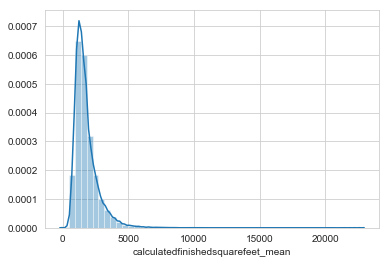

In [30]:

merged_df['calculatedfinishedsquarefeet_mean'] = merged_df['calculatedfinishedsquarefeet'].fillna(merged_df['calculatedfinishedsquarefeet'].mean())

sns.distplot(merged_df['calculatedfinishedsquarefeet_mean'])


# Use KNN cluster to predict missing values for geological location related variables

There's quite a few variables which are probably dependant on longtitude and latitude data Lets try fill in some of the missing variables using geographically nearby properties (by using the longtitude and latitude information) 

propertyzoningdesc(30000 missing), lotsizesquarefeet(missing 10000), buildingqualitytype(missing 30000), propertycountylandusecode(1 missing), 'regionidcity', 'regionidneighborhood', 'regionidzip', 'yearbuilt' (missing 1000)

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
!pip install category_encoders
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import category_encoders as ce

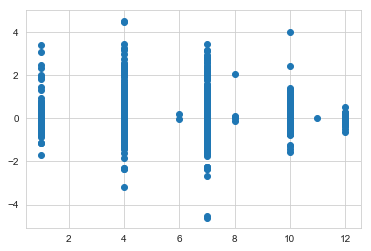

In [32]:
merged_df['buildingqualitytypeid_old'] = merged_df['buildingqualitytypeid'] 
plt.scatter(x='buildingqualitytypeid_old', y='logerror',data = merged_df)   

In [81]:
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

In [34]:
fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 1, n_neighbors = 5 )

zoningcode2int( df = merged_df,
                            target = 'propertycountylandusecode' )
fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertycountylandusecode', fraction = 1, n_neighbors = 5 )

zoningcode2int( df = merged_df,
                            target = 'propertyzoningdesc' )

fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertyzoningdesc', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


fitting
the shape of active features:  (8,)
predicting
writing result to df
num of unperdictable data:  1169.0
fit and transform
num of categories:  (78,)
recover the nan value


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


the shape of active features:  (77,)
predicting
writing result to df
num of unperdictable data:  0.0
fit and transform
num of categories:  (1997,)
recover the nan value


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


the shape of active features:  (1996,)
predicting
writing result to df
num of unperdictable data:  0.0


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


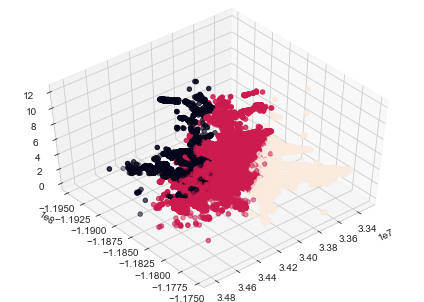

In [36]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
enc = OneHotEncoder()
base = [ 'latitude', 'longitude' ]
target = 'buildingqualitytypeid'
enc.fit( merged_df[ target ].unique().reshape( (-1,1) ) )
Y = enc.transform( merged_df[ target ].values.reshape((-1,1)) ).toarray()
X = merged_df[ base  ]
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=50, azim=50)
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid'],  c=labels.astype(np.float), s=20)   
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid_old'],  c=labels.astype(np.float), s=50)    
plt.show()

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


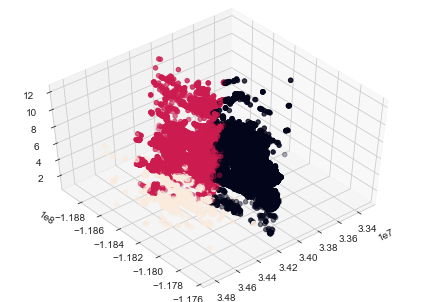

In [38]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
enc = OneHotEncoder()
miss = merged_df[target].isnull()
notmiss = ~miss 
base = [ 'latitude', 'longitude' ]
target = 'buildingqualitytypeid_old'
enc.fit( merged_df.loc[notmiss, target ].unique().reshape( (-1,1) ) )
Y = enc.transform( merged_df.loc[notmiss, target ].values.reshape((-1,1)) ).toarray()
X = merged_df.loc[notmiss, base  ]
    
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=50, azim=50)
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid'],  c=labels.astype(np.float), s=50)   
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid_old'],  c=labels.astype(np.float), s=20)    

plt.show()

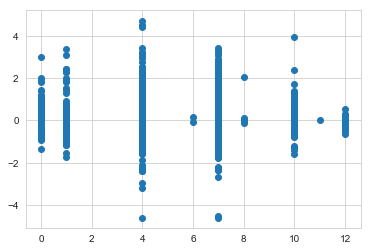

In [39]:
#plt.scatter(x='buildingqualitytypeid_old', y='logerror',data = merged_df)  
plt.scatter(x='buildingqualitytypeid', y='logerror',data = merged_df) 

In [40]:
merged_df['regionidcity_old'] = merged_df['regionidcity'] 

In [41]:
#regionidcity, regionidneighborhood & regionidzip - assume it is the same as the nereast property. 
#As mentioned above, this is ok if there's a property very nearby to the one with missing values (I leave it up to the reader to check if this is the case!)
fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 1, n_neighbors = 5 )

fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidneighborhood', fraction = 1, n_neighbors = 5 )

fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidzip', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'"

the shape of active features:  (177,)
predicting
writing result to df
num of unperdictable data:  2.0
fitting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


the shape of active features:  (494,)
predicting
writing result to df
num of unperdictable data:  185.0


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting
the shape of active features:  (388,)
predicting
writing result to df
num of unperdictable data:  0.0


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


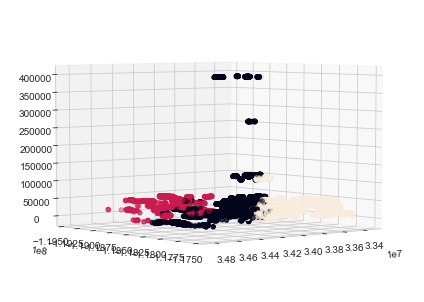

In [42]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
enc = OneHotEncoder()
base = [ 'latitude', 'longitude' ]
target = 'regionidcity'
enc.fit( merged_df[ target ].unique().reshape( (-1,1) ) )
Y = enc.transform( merged_df[ target ].values.reshape((-1,1)) ).toarray()
X = merged_df[ base  ]
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=5, azim=50)
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['regionidcity'],  c=labels.astype(np.float), s=20)   
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid_old'],  c=labels.astype(np.float), s=50)    
plt.show()

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


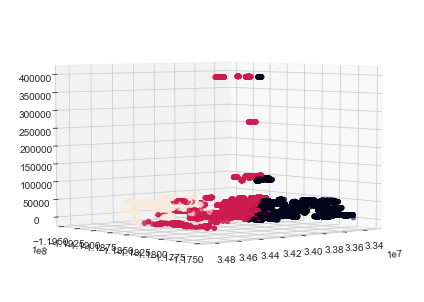

In [45]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
enc = OneHotEncoder()
miss = merged_df[target].isnull()
notmiss = ~miss 
base = [ 'latitude', 'longitude' ]
target = 'regionidcity_old'
enc.fit( merged_df.loc[notmiss, target ].unique().reshape( (-1,1) ) )
Y = enc.transform( merged_df.loc[notmiss, target ].values.reshape((-1,1)) ).toarray()
X = merged_df.loc[notmiss, base  ]
    
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=5, azim=50)
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid'],  c=labels.astype(np.float), s=50)   
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['regionidcity_old'],  c=labels.astype(np.float), s=20)    

plt.show()

In [44]:
merged_df['lotsizesquarefeet_old'] = merged_df['lotsizesquarefeet']

In [47]:
#lot size square feet - not sure what to do about this one. Lets use nearest neighbours. Assume it has same lot size as property closest to it
fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'lotsizesquarefeet', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


the shape of active features:  (20017,)
predicting


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

Text(0.5, 0, 'sqft values')

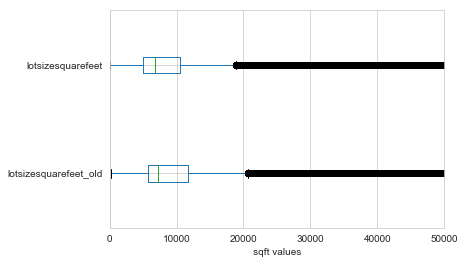

In [48]:
#check the distribution of lotsizesquarefeet before fill and afater
merged_df.boxplot(column=['lotsizesquarefeet_old','lotsizesquarefeet'], vert=False) 
plt.xlim(0,50000)
plt.xlabel('sqft values')
#plt.boxplot(x='lotsizesquarefeet', data = merged_df) 
#lotsizesquarefeet needs to be normalized before machine learning

In [49]:
merged_df['yearbuilt'] = pd.to_numeric(merged_df['yearbuilt'], errors='coerce')

In [50]:
merged_df['numberofstories_median']=merged_df['numberofstories'].fillna(merged_df['numberofstories'].mean())
merged_df['yearbuilt_median']=merged_df['yearbuilt'].fillna(merged_df['yearbuilt'].median())

In [51]:
fillna_knn( df = merged_df,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'yearbuilt', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


the shape of active features:  (130,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

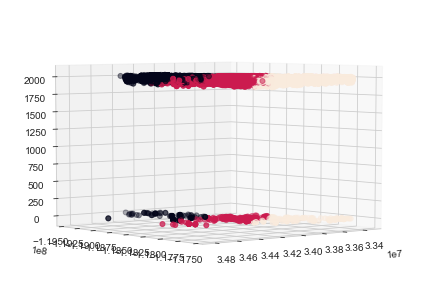

In [52]:
#Plot out knn filled yearbuilt and median filled yearbuilt. Check their differences
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

base = [ 'latitude', 'longitude' ]
target = 'yearbuilt'

Y = merged_df[ target ].values
X = merged_df[ base  ]
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=5, azim=50)
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['yearbuilt'],  c=labels.astype(np.float), s=25)   
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid_old'],  c=labels.astype(np.float), s=50)    
plt.show()

In [ ]:
merged_df[merged_df['yearbuilt']==0.0].yearbuilt.value_counts()

In [59]:
#refill 400 yearbuilt==0.0 by using median method to get rid of the 0.0 problem
merged_df.loc[merged_df['yearbuilt']==0.0,'yearbuilt']=merged_df['yearbuilt'].median()

In [60]:
merged_df[merged_df['yearbuilt']==0.0].yearbuilt.value_counts()

Series([], Name: yearbuilt, dtype: int64)

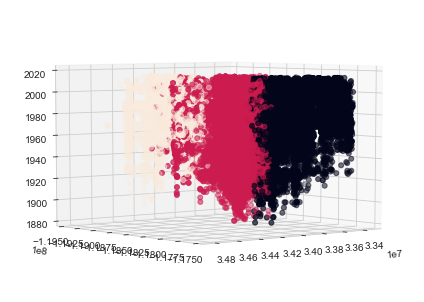

In [61]:
#Plot out knn filled yearbuilt and median filled yearbuilt. Check their differences
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

base = [ 'latitude', 'longitude' ]
target = 'yearbuilt'

Y = merged_df[ target ].values
X = merged_df[ base  ]
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=5, azim=50)
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['yearbuilt'],  c=labels.astype(np.float), s=25)   
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid_old'],  c=labels.astype(np.float), s=50)    
plt.show()

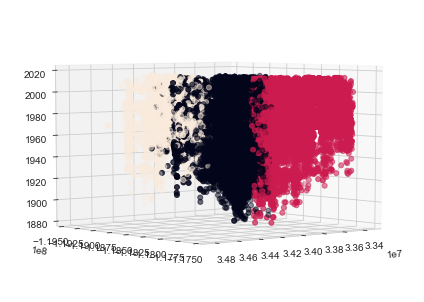

In [53]:
#Plot out knn filled yearbuilt and median filled yearbuilt. Check their differences
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

base = [ 'latitude', 'longitude' ]
target = 'yearbuilt_median'

Y = merged_df[ target ].values
X = merged_df[ base  ]
km = KMeans(n_clusters=3)
km.fit_predict(X,Y)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=5, azim=50)
ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['yearbuilt_median'],  c=labels.astype(np.float), s=25)   
#ax.scatter(merged_df['latitude'], merged_df['longitude'], merged_df['buildingqualitytypeid_old'],  c=labels.astype(np.float), s=50)    
plt.show()

# Use KNN cluster to predict missing values based on yearofbuilt
  airconditioningype (missing 60000), heatingorsystemtypeid (missing 40000)

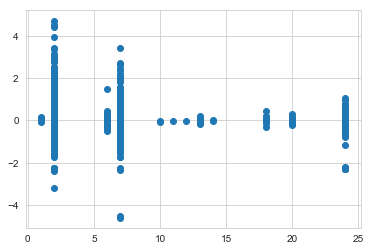

In [62]:
merged_df['heatingorsystemtypeid_old'] = merged_df['heatingorsystemtypeid']
plt.scatter(x='heatingorsystemtypeid_old', y='logerror',data = merged_df) 

In [63]:
fillna_knn( df = merged_df,
                  base = [ 'yearbuilt' ] ,
                  target = 'heatingorsystemtypeid', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


fitting
the shape of active features:  (12,)
predicting


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


writing result to df
num of unperdictable data:  0.0


/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [64]:
fillna_knn( df = merged_df,
                  base = [ 'yearbuilt' ] ,
                  target = 'airconditioningtypeid', fraction = 1, n_neighbors = 5 )

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)


fitting
the shape of active features:  (6,)
predicting
out of threshold: 98.83403258854523% > 10%


In [65]:
merged_df.drop(['airconditioningtypeid'],axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 45 columns):
parcelid                             90275 non-null int64
logerror                             90275 non-null float64
transactiondate                      90275 non-null datetime64[ns]
transaction_month                    90275 non-null int64
basementsqft                         90275 non-null float64
bathroomcnt                          90275 non-null float64
bedroomcnt                           90275 non-null float64
buildingqualitytypeid                90275 non-null float64
calculatedfinishedsquarefeet         89614 non-null float64
fips                                 90275 non-null float64
fireplacecnt                         90275 non-null float64
fullbathcnt                          89093 non-null float64
garagetotalsqft                      29937 non-null float64
hashottuborspa                       90275 non-null object
heatingorsystemtypeid                90275 non-nu

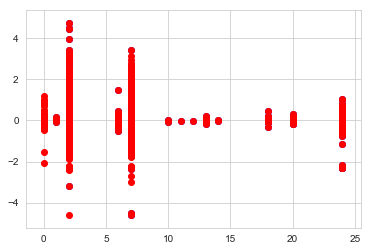

In [66]:
plt.scatter(x='heatingorsystemtypeid_old', y='logerror',data = merged_df,c= 'blue') 
plt.scatter(x='heatingorsystemtypeid', y='logerror',data = merged_df, c='red') 

In [69]:
merged_df[merged_df['heatingorsystemtypeid']==0].heatingorsystemtypeid.value_counts()

0.0    675
Name: heatingorsystemtypeid, dtype: int64

In [70]:
#This is a function trying to use target encoderto fill missing values
def fillna_ce_knn( merged_df, base, target, n_neighbors = 5 ):
    miss = merged_df[target].isnull()
    X = pd.DataFrame(merged_df[merged_df[target].notnull()][target], columns = [target])
    Y = pd.DataFrame(merged_df[merged_df[target].notnull()].logerror,columns = ['logerror'])
    
    # Target with default parameters
    ce_target = ce.TargetEncoder(cols = [target],smoothing=5)
    ce_target.fit(X, Y)
    df=ce_target.transform(X.reset_index(drop=True), Y)
    df.set_index(X.index, inplace = True)
    
    X_base = pd.DataFrame(merged_df[merged_df[target].notnull()][base])
    
    concat_miss= pd.concat([X_base,df[target]],axis=1)
    concat_miss_X = concat_miss[base]
    concat_miss_Y = concat_miss[target]
    
    
    clf = neighbors.KNeighborsRegressor( n_neighbors )
    clf.fit( concat_miss_X, concat_miss_Y )
    
    print( 'predicting' )
    Z = clf.predict(merged_df.loc[miss, base])
    

predicting


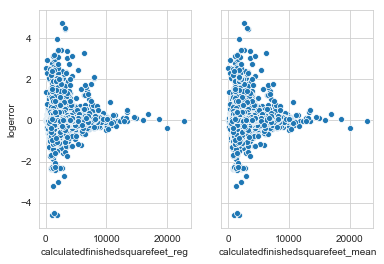

In [71]:
merged_df['taxvaluedollarcnt'] = merged_df['taxvaluedollarcnt'].fillna(merged_df['taxvaluedollarcnt'].median())
#Use KNN regressor to fill in missing calculatedfinishedsquarefeet, 400 values
def fillna_knn_regre( merged_df, base, target, n_neighbors = 5 ):
    miss = merged_df[target].isnull()
    X = pd.DataFrame(merged_df[merged_df[target].isnull()][base])
    
    
    X_base = pd.DataFrame(merged_df[merged_df[target].notnull()][base])
    Y_base = pd.DataFrame(merged_df[merged_df[target].notnull()][target])
    
    clf = neighbors.KNeighborsRegressor( n_neighbors )
    clf.fit( X_base, Y_base)
    
    print( 'predicting' )
    Z = clf.predict(X)
    
    merged_df.loc[~miss,'calculatedfinishedsquarefeet_reg'] = merged_df.loc[~miss,target]
    merged_df.loc[miss,'calculatedfinishedsquarefeet_reg'] = Z

fillna_knn_regre( merged_df, base= ['taxvaluedollarcnt'], target= 'calculatedfinishedsquarefeet', n_neighbors= 5)   
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(x=merged_df['calculatedfinishedsquarefeet_reg'], y=merged_df['logerror'], ax=ax1)
sns.scatterplot(x=merged_df['calculatedfinishedsquarefeet_mean'], y=merged_df['logerror'], ax=ax2)
plt.show()

# Use KNN cluster to predict garagetotalsqft and structuretaxvaluedollarcnt

# Fill calculated finished squarefeet carefully, and garagecarcnt, use knn regressor

In [72]:
merged_df[merged_df['calculatedfinishedsquarefeet_reg']==0].calculatedfinishedsquarefeet_reg.value_counts()

Series([], Name: calculatedfinishedsquarefeet_reg, dtype: int64)

In [83]:
fillna_ce_knn( merged_df,
                  base = [ 'calculatedfinishedsquarefeet_reg' ] ,
                  target = 'garagetotalsqft', n_neighbors = 5 )

#fillna_knn_regre( merged_df, base= ['calculatedfinishedsquarefeet_reg'], target= 'garagetotalsqft', n_neighbors= 5) 

predicting


In [85]:
index = merged_df['garagetotalsqft'].isnull()
merged_df.loc[index,'garagetotalsqft'] = 0.0 

In [ ]:
index = merged_df['fullbathcnt'].isnull()
merged_df.loc[index,'fullbathcnt'] = merged_df['bathroomcnt'] 

index = merged_df['structuretaxvaluedollarcnt'].isnull()
merged_df.loc[index,'structuretaxvaluedollarcnt'] = merged_df['taxvaluedollarcnt'] 

In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 46 columns):
parcelid                             90275 non-null int64
logerror                             90275 non-null float64
transactiondate                      90275 non-null datetime64[ns]
transaction_month                    90275 non-null int64
basementsqft                         90275 non-null float64
bathroomcnt                          90275 non-null float64
bedroomcnt                           90275 non-null float64
buildingqualitytypeid                90275 non-null float64
calculatedfinishedsquarefeet         89614 non-null float64
fips                                 90275 non-null float64
fireplacecnt                         90275 non-null float64
fullbathcnt                          90275 non-null float64
garagetotalsqft                      90275 non-null float64
hashottuborspa                       90275 non-null object
heatingorsystemtypeid                90275 non-nu

In [97]:
#Now clean up all unnecessary columns, then ouput the new csv file for story telling
merged_df.to_csv('merged_df_2016.csv')